# Аналитика крупного интернет-магазина 
    


Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import datetime as dt
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats as st
import plotly.express as px
from plotly import graph_objects as go
from plotly.offline import iplot


## Описание данных

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


### Таблица hypothesis

Hypothesis — краткое описание гипотезы;
    
    
Reach — охват пользователей по 10-балльной шкале;
    
    
Impact — влияние на пользователей по 10-балльной шкале;
    
    
Confidence — уверенность в гипотезе по 10-балльной шкале;
    
    
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [3]:
orders = pd.read_csv('/datasets/orders.csv')
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


### Таблица orders

transactionId — идентификатор заказа;

visitorId — идентификатор пользователя, совершившего заказ;

date — дата, когда был совершён заказ;

revenue — выручка заказа;

group — группа A/B-теста, в которую попал заказ.

In [4]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


### Таблица visitors

date — дата;
    
group — группа A/B-теста;
    
visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Приоритизирование гипотез

In [5]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


### Применим фреймворк ICE для приоритизации гипотез.

In [6]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis = hypothesis.round(2).sort_values(by='ICE', ascending=False)
hypothesis.index = range(len(hypothesis))

hypothesis_ICE = hypothesis[['Hypothesis', 'ICE']].reset_index()
hypothesis_ICE.columns = ['ICE_priority', 'Hypothesis', 'ICE']
hypothesis_ICE['ICE_priority'] += 1
hypothesis_ICE

,ICE_priority,Hypothesis,ICE
0,1,"Запустить акцию, дающую скидку на товар в день...",16.20
1,2,"Добавить два новых канала привлечения трафика,...",13.33
2,3,Добавить форму подписки на все основные страни...,11.20
3,4,Показать на главной странице баннеры с актуаль...,8.00
4,5,Добавить блоки рекомендаций товаров на сайт ин...,7.00
5,6,"Запустить собственную службу доставки, что сок...",2.00
6,7,"Добавить страницу отзывов клиентов о магазине,...",1.33
7,8,"Изменить структура категорий, что увеличит кон...",1.12
8,9,"Изменить цвет фона главной страницы, чтобы уве...",1.00


### Применим фреймворк RICE для приоритизации гипотез.


In [7]:
hypothesis['RICE'] = hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts']
hypothesis = hypothesis.round(2).sort_values(by='RICE', ascending=False)

hypothesis.index = range(len(hypothesis))
hypothesis_RICE = hypothesis[['Hypothesis', 'RICE']].reset_index()
hypothesis_RICE.columns = ['RICE_priority', 'Hypothesis', 'RICE']
hypothesis_RICE['RICE_priority'] += 1
hypothesis_RICE

,RICE_priority,Hypothesis,RICE
0,1,Добавить форму подписки на все основные страни...,112.0
1,2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
2,3,"Добавить два новых канала привлечения трафика,...",40.0
3,4,Показать на главной странице баннеры с актуаль...,40.0
4,5,"Запустить акцию, дающую скидку на товар в день...",16.2
5,6,"Изменить структура категорий, что увеличит кон...",9.0
6,7,"Запустить собственную службу доставки, что сок...",4.0
7,8,"Добавить страницу отзывов клиентов о магазине,...",4.0
8,9,"Изменить цвет фона главной страницы, чтобы уве...",3.0


In [8]:
# соединим все в одну таблицу
ICE_RICE_priority = hypothesis_ICE.merge(hypothesis_RICE, on='Hypothesis').sort_values(by='ICE', ascending=False)
ICE_RICE_priority = ICE_RICE_priority[['Hypothesis', 'ICE_priority', 'RICE_priority']]
ICE_RICE_priority


,Hypothesis,ICE_priority,RICE_priority
0,"Запустить акцию, дающую скидку на товар в день...",1,5
1,"Добавить два новых канала привлечения трафика,...",2,3
2,Добавить форму подписки на все основные страни...,3,1
3,Показать на главной странице баннеры с актуаль...,4,4
4,Добавить блоки рекомендаций товаров на сайт ин...,5,2
5,"Запустить собственную службу доставки, что сок...",6,7
6,"Добавить страницу отзывов клиентов о магазине,...",7,8
7,"Изменить структура категорий, что увеличит кон...",8,6
8,"Изменить цвет фона главной страницы, чтобы уве...",9,9


Приоритет среди гипотез очень поменялся,когда мы применили фреймфорк RICE.

<b>Приоритетные гипотезы в фреймфорке ICЕ:</b>

Запустить акцию, дающую скидку на товар в день рождение

Добавить два новых канала привлечения трафика

Добавить форму подписки на все основные страницы

<b>Приоритетные гипотезы в фреймфорке RICЕ:</b>

Добавить форму подписки на все основные страницы

Добавить блоки рекомендаций товаров на сайт 

Добавить два новых канала привлечения трафика

Параметр Reach внес свои весьма значительные корретивы. Несмотря на то, что акция с Днем Рождением кажется интересной, тем ни мение, охват у нее будет совсем не большой. При этом на первое место RICE ставит добавление формы подписки на основные страницы, что в целом может удерживать их внимание. 

Поднялись в приоритете гипотезы блоках с рекомендациями товаров, а так же два новых канала привлечения. Одинаково низкий приоритет имеет гипотеза об изменении цвета фона главной страницы. 


## Анализ A/B-теста

In [9]:

orders['date'] = pd.to_datetime(orders['date'])
#orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%d/%m/%Y'))
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [10]:
visitors['date'] = pd.to_datetime(visitors['date'])
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [11]:
orders.isnull().sum()


transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [12]:
orders.duplicated().sum()


0

In [13]:

visitors.isnull().sum()


date        0
group       0
visitors    0
dtype: int64

In [14]:
visitors.duplicated().sum()

0

В таблице <b>orders</b> нет пропусков или дубликатов. Столбецы transactionId, visitorId, revenue имеют тип данный int64, столбец date: datetime64[ns](дата и время), group: object

В таблице <b>visitors</b> нет пропусков или дубликатов. Столбец date: datetime64[ns](дата и время), group: object, visitors: int64

### График кумулятивной выручки по группам. Выводы и предположения.

In [15]:
cummulativeRevenue = orders.groupby(['group', 'date'])['revenue'].sum().groupby(level=[0]).cumsum().to_frame()
cummulativeRevenue = cummulativeRevenue.reset_index()
cummulativeRevenue.head(5)

,group,date,revenue
0,A,2019-08-01,148579
1,A,2019-08-02,242401
2,A,2019-08-03,354874
3,A,2019-08-04,425699
4,A,2019-08-05,549917


Text(0.5, 1.0, 'График кумулятивной выручки по группам')

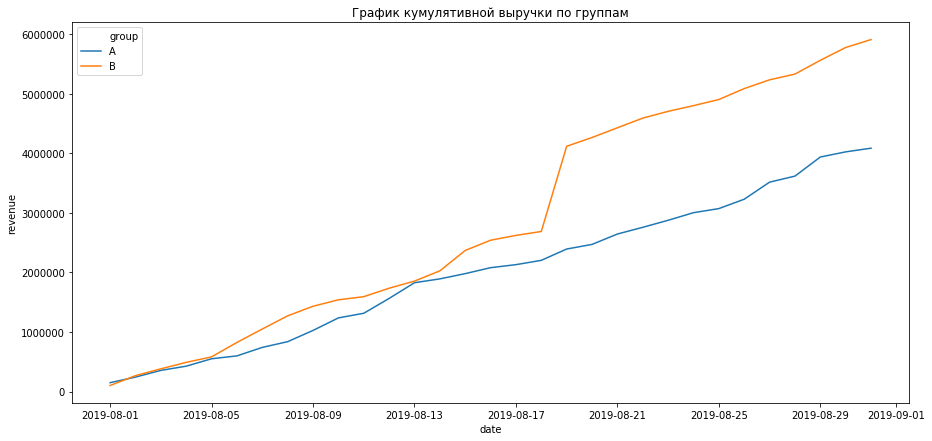

In [16]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.figure(figsize=(15, 7))
(sns.lineplot(
    x='date',
    y='revenue',
    hue='group',
    data=cummulativeRevenue,
    markers=True,
    dashes=False).set_title("График кумулятивной выручки по группам"))

Графиу коммулятивной выручки группы В выше, чем группы А. Пользователи группы В, для который сайт версии В, приносят нам больше выручки, чем пользователи группы А, видимо их версия сайта не такая привлекательная

### График кумулятивного среднего чека по группам. Выводы и предположения.

In [17]:
cummulativeRevenue_mean_check = (orders
                      .groupby(['group', 'date'])['revenue']
                      .mean()
                      .groupby(level=[0])
                      .cumsum()
                      .round(2)
                      .to_frame()           
                      .reset_index()
                 )

In [18]:
cummulativeRevenue_mean_check.head()

,group,date,revenue
0,A,2019-08-01,6190.79
1,A,2019-08-02,10881.89
2,A,2019-08-03,15568.27
3,A,2019-08-04,19994.83
4,A,2019-08-05,24963.55


In [19]:
orders = orders.copy()
orders.rename(columns={'visitorId': 'userId', 'transactionId': 'orderId'}, inplace=True)

In [20]:
datesGroups = orders[['date','group']].drop_duplicates()
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'orderId' : pd.Series.nunique,
'userId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cummulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cummulativeData.head()


,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Text(0.5, 1.0, 'График кумулятивного среднего чека по группам')

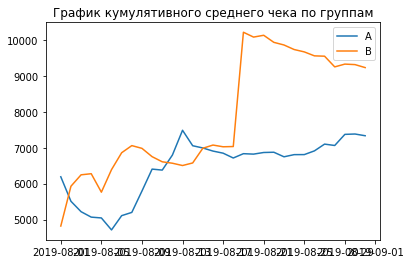

In [21]:
cummulativeRevenueA = cummulativeData[cummulativeData['group']=='A'][['date','revenue', 'orders']]
cummulativeRevenueB = cummulativeData[cummulativeData['group']=='B'][['date','revenue', 'orders']]

plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue']/cummulativeRevenueA['orders'], label='A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue']/cummulativeRevenueB['orders'], label='B')
plt.legend()
plt.title('График кумулятивного среднего чека по группам')

Ближе к концу графика средний чек по группе В явно выше, чем средний чек по группе А. Группа А явно приносит меньше выручки, чем группа В даже по средним показателям. Опять видно скачек у группы В в августе. 

### График относительного изменения кумулятивного среднего чека группы B к группе A. Выводы и предположения.

In [22]:
cummulativeRevenueA_mean_check = cummulativeRevenue_mean_check.query('group == "A"')['revenue'].tolist()
cummulativeRevenueB_mean_check = cummulativeRevenue_mean_check.query('group == "B"')['revenue'].tolist()

mean_check_Revenue = [y/x for x,y in zip(cummulativeRevenueA_mean_check, cummulativeRevenueB_mean_check)]

cummulative_mean_check_1 = pd.DataFrame({'date': cummulativeRevenue_mean_check['date'].unique(),
                                   'mean_check_AB': mean_check_Revenue})

Text(0.5, 1.0, 'График относительного изменения кумулятивного среднего чека группы B к группе A')

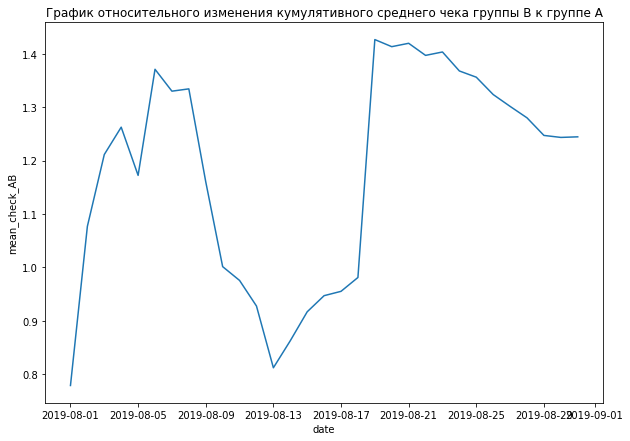

In [23]:
cummulative_mean_check_1
plt.figure(figsize=(10, 7))
(sns.lineplot(
    x='date',
    y='mean_check_AB',
    data=cummulative_mean_check_1,
    markers=True,
    dashes=False).set_title("График относительного изменения кумулятивного среднего чека группы B к группе A"))


График не ровный, возможно, есть выборсы, надо будет в дальнейшем это проверить. 

### График кумулятивной конверсии по группам. Выводы и предположения.

In [24]:
#orders.rename(columns={'visitorId': 'userId', 'transactionId': 'orderId'}, inplace=True)
conversion = orders.groupby(['date', 'group'])['orderId'].nunique().to_frame().reset_index()

cum_conversion = conversion.merge(visitors, on=['date', 'group'])
cum_conversion['conversion'] = (cum_conversion['orderId'] / cum_conversion['visitors']).round(4)
cum_conversion = cum_conversion[['date', 'group', 'conversion']]
cum_conversion = (cum_conversion
                          .groupby(['group', 'date'])['conversion']
                          .mean()
                          .groupby(level=[0])
                          .cumsum()
                          .round(2)
                          .to_frame()
                 )
cum_conversion = cum_conversion.reset_index()



Text(0.5, 1.0, 'График кумулятивной конверсии по группам')

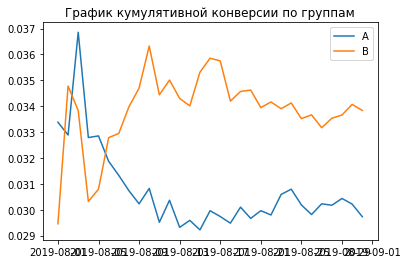

In [25]:
cummulativeData['conversion'] = cummulativeData['orders']/cummulativeData['visitors']
cummulativeDataA = cummulativeData[cummulativeData['group']=='A']
cummulativeDataB = cummulativeData[cummulativeData['group']=='B']
plt.plot(cummulativeDataA['date'], cummulativeDataA['conversion'], label='A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['conversion'], label='B')
plt.legend()
plt.title('График кумулятивной конверсии по группам')

 На протяжении всего графика группа В выше кгруппы А. То есть конверсия группы В стабильно выше конверсии группы А. 

### График относительного изменения кумулятивной конверсии группы B к группе A. Выводы и предположения.

In [26]:
cum_conversion_АB = cum_conversion.reset_index()

mean_conv_A = cum_conversion_АB.query('group == "A"')['conversion'].tolist()
mean_conv_B = cum_conversion_АB.query('group == "B"')['conversion'].tolist()

conversion_mean = [y/x for x,y in zip(mean_conv_A, mean_conv_B)]

cum_conversion_АB_mean = pd.DataFrame({'date': cum_conversion_АB['date'].unique(),
                                  'conversion': conversion_mean})

In [27]:
cum_conversion_АB_mean.head(2)

,date,conversion
0,2019-08-01,1.0
1,2019-08-02,1.0


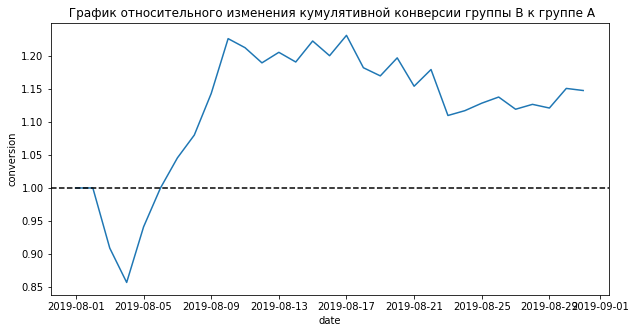

In [28]:

plt.figure(figsize=(10, 5))
(sns.lineplot(
    x='date',
    y='conversion',
    data=cum_conversion_АB_mean,
    markers=True,
    dashes=False).set_title(" График относительного изменения кумулятивной конверсии группы B к группе A"))
plt.axhline(y=1, color='black', linestyle='--')

По графику можно сделать вывод, что отношение конверсии установилось, и группа В явно лидирует. 

### Точечный график количества заказов по пользователям. Выводы и предположения.

In [29]:
orders.head(5)

,orderId,userId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Text(0.5, 1.0, 'Точечный график количества заказов по пользователям')

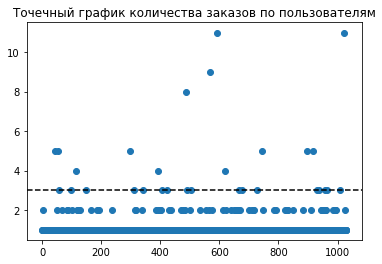

In [30]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('userId', as_index=False).agg({'orderId' : pd.Series.nunique})

ordersByUsers.columns = ['userId','orderId']
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orderId'])
plt.axhline(y=3, color='black', linestyle='--')
plt.title('Точечный график количества заказов по пользователям')

Набольшее число заказов 1-2. Чуть меньше три. Так что можно сказать, что все, что выше трех заказов - это встречается не так часто. Но стоит проверить через перцентили. 

### 95-й и 99-й перцентили количества заказов на пользователя. Выбор граници для определения аномальных пользователей.

In [31]:
print(np.percentile(ordersByUsers['orderId'], [90, 95, 98, 99]))

[1. 2. 3. 4.]


95й перцентиль равен 2, 99й 4, но как м выидимо на графике - 4 уж слишком редкий. Так что оставим границу для отсеивания аномальных пользователей до 3х. 98й перцентиль равен 3

### Точечный график стоимостей заказов. Выводы и предположения.

Text(0.5, 1.0, 'Точечный график стоимостей заказов')

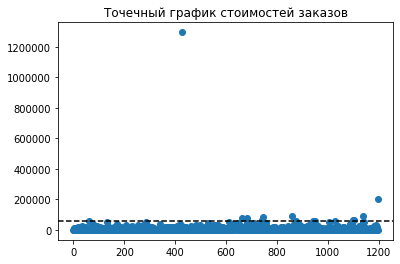

In [32]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.axhline(y=60000, color='black', linestyle='--')
plt.title('Точечный график стоимостей заказов')

Есть выборос выше 1200000, в большенстве своем заказы не превышают 100000.Надо изучить перцентили. 

### 95-й и 99-й перцентили стоимости заказов. Выбор граници для определения аномальных заказов.

In [33]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


95-й перцентиль равен 28000, а 99-й равен 58233. В целом границу можно обозначить в 58233, но округлим <b>60000</b>.

### Статистическая значимость различий в конверсии между группами по «сырым» данным. Выводы и предположения.

Сформулируем гипотезы, их проверим как на сырых данных, так и на очищенных.

#### Статистическая значимость различий в конверсии между группами

<b>Ho</b>: статистически значимых различий в конверсии групп A и B нет

<b>H1</b>: конверсия группы В отличается в конверсии от группы А

Так как ранее на графиках мы видели, что в данных есть большие выбросы, то обратимся в к методу U-критерия Манна Утни. 

In [34]:
visitors.head(2)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619


In [35]:
orders.head(2)

,orderId,userId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B


In [36]:
orders_new = orders.copy()
orders_new.rename(columns={'visitorId': 'userId', 'transactionId': 'orderId'}, inplace=True)


In [37]:
import scipy.stats as stats
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = orders_new[orders_new['group']=='A'][['date', 'orderId', 'userId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'orderId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders_new[orders_new['group']=='B'][['date', 'orderId', 'userId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'orderId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

ordersByUsersA = orders_new[orders_new['group']=='A'].groupby('userId', as_index=False).agg({'orderId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders_new[orders_new['group']=='B'].groupby('userId', as_index=False).agg({'orderId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

ordersByUsersA = orders_new[orders_new['group']=='A'].groupby('userId', as_index=False).agg({'orderId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders_new[orders_new['group']=='B'].groupby('userId', as_index=False).agg({'orderId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))


0.00840
0.138


Отвергаем нулевую гипотезу, конверсия группы В отличается в конверсии от группы А.
p-value = 0.00840. Это значительно меньше 0.05. Анализ сырых данных сообщает, что в конверсии есть статистически значимое различие между группами. Относительный прирост группы В к группе А равен 13%. 

### Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным. Выводы и предположения.

Сформулируем гипотезы, их проверим как на сырых данных, так и на очищенных.

#### Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

<b>Ho</b>: статистически значимых различий в среднем чеке заказа между группами нет

<b>H1</b>: статистически значимые различия в среднем чеке заказа между группами есть

Так как ранее на графиках мы видели, что в данных есть большие выбросы, то обратимся в к методу U-критерий Манна Утни. 

In [38]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = orders_new[orders_new['group']=='A'][['date', 'orderId', 'userId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'orderId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders_new[orders_new['group']=='B'][['date', 'orderId', 'userId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'orderId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

print("{0:.3f}".format(stats.mannwhitneyu(orders_new[orders_new['group']=='A']['revenue'], orders_new[orders_new['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders_new[orders_new['group']=='B']['revenue'].mean()/orders_new[orders_new['group']=='A']['revenue'].mean()-1))


0.365
0.259


Принимаем нулевую гипотезу: статистически значимых различий в среднем чеке заказа между группами нет
P-value = 0.365. Больше 0,05. Это говорит нам о том, что статистически значимых различий в среднем чеке между группами  нет. Относительное различие серднего чека между группами = 0.259

### Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Выводы и предположения.

Гипотезы для статистической значимости ращличий в конверсии прописаны выше

In [39]:
ordersByUsersA = orders_new[orders_new['group']=='A'].groupby('userId', as_index=False).agg({'orderId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders_new[orders_new['group']=='B'].groupby('userId', as_index=False).agg({'orderId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders_new[orders_new['revenue'] > 60000]['userId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

In [40]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = orders_new[orders_new['group']=='A'][['date', 'orderId', 'userId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'orderId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders_new[orders_new['group']=='B'][['date', 'orderId', 'userId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'orderId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

ordersByUsersA = orders_new[orders_new['group']=='A'].groupby('userId', as_index=False).agg({'orderId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders_new[orders_new['group']=='B'].groupby('userId', as_index=False).agg({'orderId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']



usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders_new[orders_new['revenue'] > 10000]['userId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

print("{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.00448
0.205


Отвергаем нулевую гипотезу, конверсия группы В отличается в конверсии от группы А даже в очищенных данных
p-value = 0.00448. Это значительно меньше 0.05. Анализ очищенных данных сообщает, что в конверсии есть статистически значимое различие между группами. Относительный прирост группы В к группе А равен 20%.

### Статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Выводы и предположения.

Гипотезы для различий в среднем чеке прописаны выше

In [41]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = orders_new[orders_new['group']=='A'][['date', 'orderId', 'userId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'orderId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders_new[orders_new['group']=='B'][['date', 'orderId', 'userId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'orderId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

ordersByUsersA = orders_new[orders_new['group']=='A'].groupby('userId', as_index=False).agg({'orderId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders_new[orders_new['group']=='B'].groupby('userId', as_index=False).agg({'orderId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders_new[orders_new['revenue'] > 10000]['userId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

print("{0:.3f}".format(stats.mannwhitneyu(
    orders_new[np.logical_and(
        orders_new['group']=='A',
        np.logical_not(orders_new['userId'].isin(abnormalUsers)))]['revenue'],
    orders_new[np.logical_and(
        orders_new['group']=='B',
        np.logical_not(orders_new['userId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders_new[np.logical_and(orders_new['group']=='B',np.logical_not(orders_new['userId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders_new[np.logical_and(
        orders_new['group']=='A',
        np.logical_not(orders_new['userId'].isin(abnormalUsers)))]['revenue'].mean() - 1))


0.483
0.002


Принимаем нулевую гипотезу: статистически значимых различий в среднем чеке заказа между группами нет, даже в очищенных данных.
P-value = 0.483. Больше 0,05. Это говорит нам о том, что статистически значимых различий в среднем чеке между группами  нет. Относительное различие серднего чека между группами = 0.002

# Выводы


Проверена приоритетность гипотез фреймворком ICE и фреймворком RICE. По фреймфорку RICE наиболее приоритетные гипотезы: 

Добавить форму подписки на все основные страницы

Добавить блоки рекомендаций товаров на сайт 

Добавить два новых канала привлечения трафика

Так же был проведен анализ А/В теста. В ходе которого выявлено, что группа B больше конвертирует из пользователя в покупателя, чем группа А, как в "очищенных" так и в "сырых" данных.Конверсия статистически значима. Но при этом в среднем чеке обеих групп нет статистически значимых различий.

<b>А/В тест можно остановить, зафиксировать победу группы B по конверсии.</b>